# Web Scraping -- Steam Online Game

## Introduction - Online Game Industry

For the past decade, the shift from physical to digital has been very disruptive to for music, and movies, and more so the gaming industry. Video game industry silently taking over the entertainment world. There was a time when brothers are fighting for one console to top each other’s score on Tetris in Gameboy. Today we have E-sports tournaments which takes the form of multiplayer video game competitions between teams of professional gamers.

Gone are the days when gaming was an activity to pass the time. The game culture has grown out of its niche community, which brings different perspective in profit-generating channels from merchandising to live events, streaming services, online advertising, and brand endorsement; literally taking the game to the center stage with a global audience1.

With two major catalysts 1) the network effect and 2) the fast network which made streaming game services feasible, video game industry has easily outpaced their contemporaries in the filem and music industry, with below graph showing direct consumer spending as the highest within the gaming sector.


## Imaginery Client

We have been approached by a company hoping to understand online game market via Steam. We will provide the findings to inform decisions about

#1--game/genre preference per country

#2--game addictive variable based on time factor

#3--game popularity

## Business Value
Video games market is worth more than music and movies combined so why aren’t more developer or even Tech Giant focus in launching games services? The online game model provides social interaction, popularity, and addictivity with time factor. These are key drivers for value generation. We will use the findings we provide them to inform decisions about how best to manage the marketing focus and increase the success of the next release.

## Project Goal
The motivation of this project is to retrieve, process and analyse data via Steam Store. This allows us to gain insights into what makes a game more successful in terms of Country and Gamer's Habit(Total Time Played per Game). 

## Dataset - Steam API
Steam is the ultimate destination for playing, discussing, and creating games. To date, it has 32,000 total games with 26 million users. Our suggestion is with its large users database, it is an undertapped industry with a huge raw database to inform valuable decisions. <br><br>
A large part of Steam's success as a platform is due to its use of frequent sales, convenience as a unified digital game library, and the aforementioned shift to digital over physical. Whilst other platforms are emerging and gaining traction, there is likely no better resource for examining gaming over the last decade. With that in mind, if we can construct a dataset from Steam's data, we will have access to a wealth of information about nearly 32,000 games released since 2003, when Steam first launched.

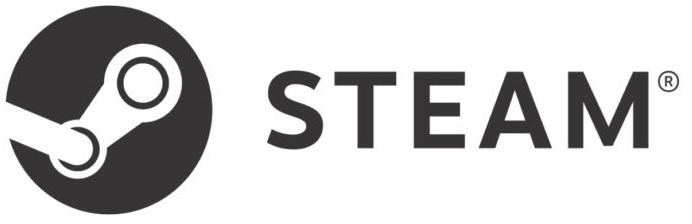

1 --  Data Collection Strategy<br><br>
In general, we source for the key and SteamID, input into 3APIs and generate User Data for Data Analysis and Data Visualization.<br><br>
-- Generate Steam ID and Get API
    
    Generate Steam ID
    Get API 
    - GetPlayerSummaries
    - returnPlayTime
    - GetPlayerSummaries
     
-- Main ( )
    
2 -- Data Visualization

    Graph 1 -- Gamer's Habit
    US, Russia, China has the most populated concentrated players
    To consider to develop Steam online game in the US region as it is still a lightly tapped market
    
    Graph 2 -- Gamers Frequency per Location
    We suggest to include English, Russian, and Madarin as languages variations  to game development as US, Russia, and China, has the most populated concentrated players
    
    Graph 3 -- Games Frequency per Location
    Please consider to continue to develop Steam online game in the US region, a potential lightly tapped market. Even though the revenue growth is higher in Russia and China, we suggested the US region due to its consistent revenue growth with +7.3% growth on the year 2020, high spending power, and a leading game industry (as well as a profession).
    

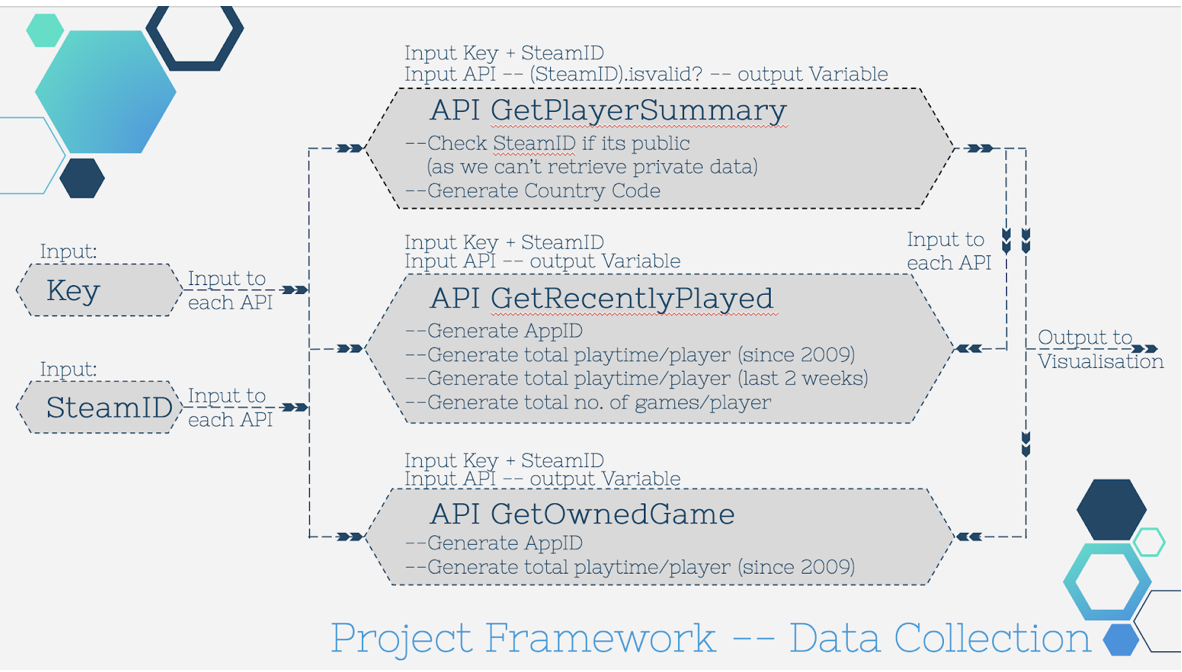

## 1 -- Data Collection Strategy

## Generate Steam ID

In [ ]:
# find steamIDs
def steamid_to_64bit(steamid):
    steam64id = 76561197960265728
    
    id_split = steamid.split(":")
    steam64id += int(id_split[2]) * 2
    if id_split[1] == "1":
        steam64id += 1
    return steam64id

# simple format of steam id: STEAM_1:1:66138017 --> we generate the last 8 digits consecutively
Id_list = []
for num in range(20000000, 20000100):
    steam_Id = "STEAM_1:1:" + str(num)
    Id_list.append(steam_Id)

# generate 64-bit steamID list and csv file 
steamId_64bit = []
with open("steamid.csv", "w") as f:
    for i in Id_list:
        steamId_64bit.append(str(steamid_to_64bit(i)))
        steamId = str(steamid_to_64bit(i)) + ",\n"
        f.write(steamId)

### Input SteamIDs to get user country from GetPlayerSummaries
In order to generate sufficient valid Ids for analysis, which should represent public users that contain location information, we create a helper function named “GetPlayerSummaries”.

This function will return boolean value given a particular steamId, if return True, we will add that particular steamId to a list and ultimately save the steamIds in that list to a txt document.

GetPlayerSummaries is an API, We use the API to check if the steamids are public or not,
This function will return boolean value given the ["response"]["players"][0]["loccountrycode"] exists or not. Ultimately to make sure valid steam API key

In [ ]:
def GetPlayerSummaries(steamId):
    steamId = str(steamId)
    params = {
        "steamids" : steamId
    }
    try:
        url = requests.get("https://api.steampowered.com/ISteamUser/GetPlayerSummaries/v2/?key=72797CA67785C46C4DDB70C6F4C295D3&format=json" ,params=params)
        data = json.loads(url.text)
        if data["response"]["players"][0]["loccountrycode"] is not None:
            return True
        else:
            return False
    except:
        return False

Change the format of steamid to 64bits format. We define another function named “steamid_to_64bit” that will change "STEAM_X:Y:Z" format into 64 bits format, which is more convenient for further analysis. Details about patterns of steamIds can click Steam ID.

### ! Challenges 
Challenge #1 --- Due to the large amount of invalid steamids, we are required to set conditions to make sure that the steamids are valid. Once we generate sufficient steamid, which is 5000 valid steamid, we could call these functions to output a dataframe

Challenge #2 --- Steam website has only allow for 100,000 requests per day. Even though we are able to source for keys as a passcode from friends, it is insufficient as only 1% of steam id has valid user information in regards to total time played etc. Our solution is to identify a pattern in SteamID, break down the 17 digit Steam ID (with smaller range and more efficient computational algorithm) to computationally generate 8 digit and convert it back to 17 digit Steam ID3.


In [ ]:
def steamid_to_64bit(steamid):
    steam64id = 76561197960265728

    id_split = steamid.split(":")
    steam64id += int(id_split[2]) * 2
    if id_split[1] == "1":
        steam64id += 1
    return steam64id

### Test Valid SteamID in Main ( )
After defining these functions, we can run logic in main() to generate valid user Ids for analysis.

A lot of times there are no response when a request is made (returns None). This usually happens when too many requests are made in a short period of time, and the polling limit has been reached. We try to avoid this by pausing briefly between requests. Handling these errors in this way ensures that our function almost always returns the desired response.

In [3]:
import numpy as np
import pandas as pd

In [ ]:
def main():

    initialSteamIDList = []
    """
    8digits, We can control the range so that to control the number of steamID
    e.g. for i in range(40100000, 40100500) to test 500 values and append valid ids into finalList 
    """
    for i in range(40100000, 40100500):
        x = "STEAM_1:1:" + str(i)
        initialSteamIDList.append(x)

    finalList = []

    for steamID in initialSteamIDList:
        x = steamid_to_64bit(steamID)
        if GetPlayerSummaries(x):
            finalList.append(x)
        else:
            continue

    #txt file name 
    with open("./data/steamid", "w") as f:
        for item in finalList:
            f.write("%s\n"  % str(item))

if __name__ == "__main__":
    main()

## Get API

### Computing Dataframe
In order to generate dataframe, we need to do request and pull data from particular API and transform json to dictionary, if the length of dictionary is zero or request is unsuccessful, return NaN, therefore, we import packages as following:

In [2]:
import requests
import json
import numpy as np

### GetPlayerSummaries

In [10]:
def GetPlayerSummaries(steamId):
    #steamids string
    try:
        steamId = str(steamId)
        params = {
            "steamids" : steamId,
            "key" : "72797CA67785C46C4DDB70C6F4C295D3"
        }
        url = requests.get("https://api.steampowered.com/ISteamUser/GetPlayerSummaries/v2/" ,params=params)
        # print(url)
        data = json.loads(url.text)
        return data["response"]["players"][0]["loccountrycode"]
    except:
        return np.nan

### RecentlyPlayedGames

In [13]:
def GetRecentlyPlayedGames(steamid):
    #steamid	uint64	✔	The player we're asking about
    url = "http://api.steampowered.com/IPlayerService/GetRecentlyPlayedGames/v1/?key=72797CA67785C46C4DDB70C6F4C295D3&format=json"

    params={
    'steamid':steamid,
    }
    response = requests.get(url,params=params)
    d = json.loads(response.text)
    RecentlyPlayedGame_Dict = {}

    try: 
        count_of_game = d["response"]["total_count"]
    except:
        count_of_game = 0

    try:
        if bool(d["response"]):
            for i in range(len(d["response"]["games"])):
                gameID = d["response"]["games"][i]["appid"]
                game_name = d["response"]["games"][i]["name"]
                playtime_2w = d["response"]["games"][i]["playtime_2weeks"]

                RecentlyPlayedGame_Dict[gameID] = [game_name,playtime_2w]
                # RecentlyPlayedGame_Dict[gameID] = playtime_2w
    except:
        RecentlyPlayedGame_Dict = {}

    return (count_of_game,RecentlyPlayedGame_Dict)

### returnPlayTime

In [14]:
def returnPlayTime(steamId):
    #steamid	uint64	
    #include_appinfo	bool
    #include_played_free_games	bool
    #32196D5A386BD32E48454D8C69AC2C43
    params = {
        "steamid" : int(steamId),
        "key" : "32196D5A386BD32E48454D8C69AC2C43",
        "include_appinfo" : True,
        "include_played_free_games" : True
    }
    try:
        url = requests.get("https://api.steampowered.com/IPlayerService/GetRecentlyPlayedGames/v1/", params=params)
        D = json.loads(url.text)
        print(D)
        # bool(D["response"]) : if this is not an empty dict => return True , otherwise False
        if bool(D["response"]):
            DList = D["response"]["games"]
            getTimeList = []
            for app in DList:
                if app["playtime_forever"] is not None:
                    getTimeList.append(app["playtime_forever"])
                else:
                    getTimeList.append(0)
            return sum(getTimeList)
        else:
            return np.nan
    except:
        return np.nan

In [ ]:
def GetRecentlyPlayedGames(steamid):
    #steamid	uint64	✔	The player we're asking about
    url = "http://api.steampowered.com/IPlayerService/GetRecentlyPlayedGames/v1/?key=72797CA67785C46C4DDB70C6F4C295D3&format=json"

    params={
    'steamid':steamid,
    }
    response = requests.get(url,params=params)
    d = json.loads(response.text)
    RecentlyPlayedGame_Dict = {}

    try: 
        count_of_game = d["response"]["total_count"]
    except:
        count_of_game = 0

    try:
        if bool(d["response"]):
            for i in range(len(d["response"]["games"])):
                gameID = d["response"]["games"][i]["appid"]
                game_name = d["response"]["games"][i]["name"]
                playtime_2w = d["response"]["games"][i]["playtime_2weeks"]

                RecentlyPlayedGame_Dict[gameID] = [game_name,playtime_2w]
                # RecentlyPlayedGame_Dict[gameID] = playtime_2w
    except:
        RecentlyPlayedGame_Dict = {}

    return (count_of_game,RecentlyPlayedGame_Dict)

## Main ( ) 
Using for loop to loop over the steamIds generated from above section and store information to lists by pulling data via steamAPI. Finally, put all lists into a dataframe and finally output a txt or csv file.

In [ ]:
def main():

    gameCount = []
    recentlyPlayed = []
    playTime = []
    location = []

    with open('./data/steamid.txt', "r") as f:
        userIdList = f.readlines()

    counter = 0
    for userId in userIdList:
        counter +=1
        if counter == 5000:
            break
        try:
            result = GetRecentlyPlayedGames(int(userId))
            gameCount.append(result[0])
            recentlyPlayed.append(result[1])
            playTime.append(returnPlayTime(int(userId)))
            location.append(GetPlayerSummaries(userId))
        except:
            gameCount.append(np.nan)
            recentlyPlayed.append(np.nan)
            playTime.append(np.nan)
            location.append(np.nan)

    
    d = {"SteamID" : pd.Series(userId),
         "Game_Count" : pd.Series(gameCount),
         "Game_List" : pd.Series(recentlyPlayed),
         "TotalPlayTime" : playTime,
         "Location" : location}

    df = pd.DataFrame(d)

    df.to_csv("./data/output.txt")
        
if __name__ == "__main__":
    main()

# 2 -- Data Visualisation

## Data Visualisation and Insights
We first compiled our data in csv file, output as a dataframe via Panda and Seaborn. With existing 5000 valid Steam ID, we managed to plot 3 graphs to share our insights


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('user_loc_4.txt',delimiter=',')
df.head(20)

### Graph 1 -- The graph reflects gamers habit

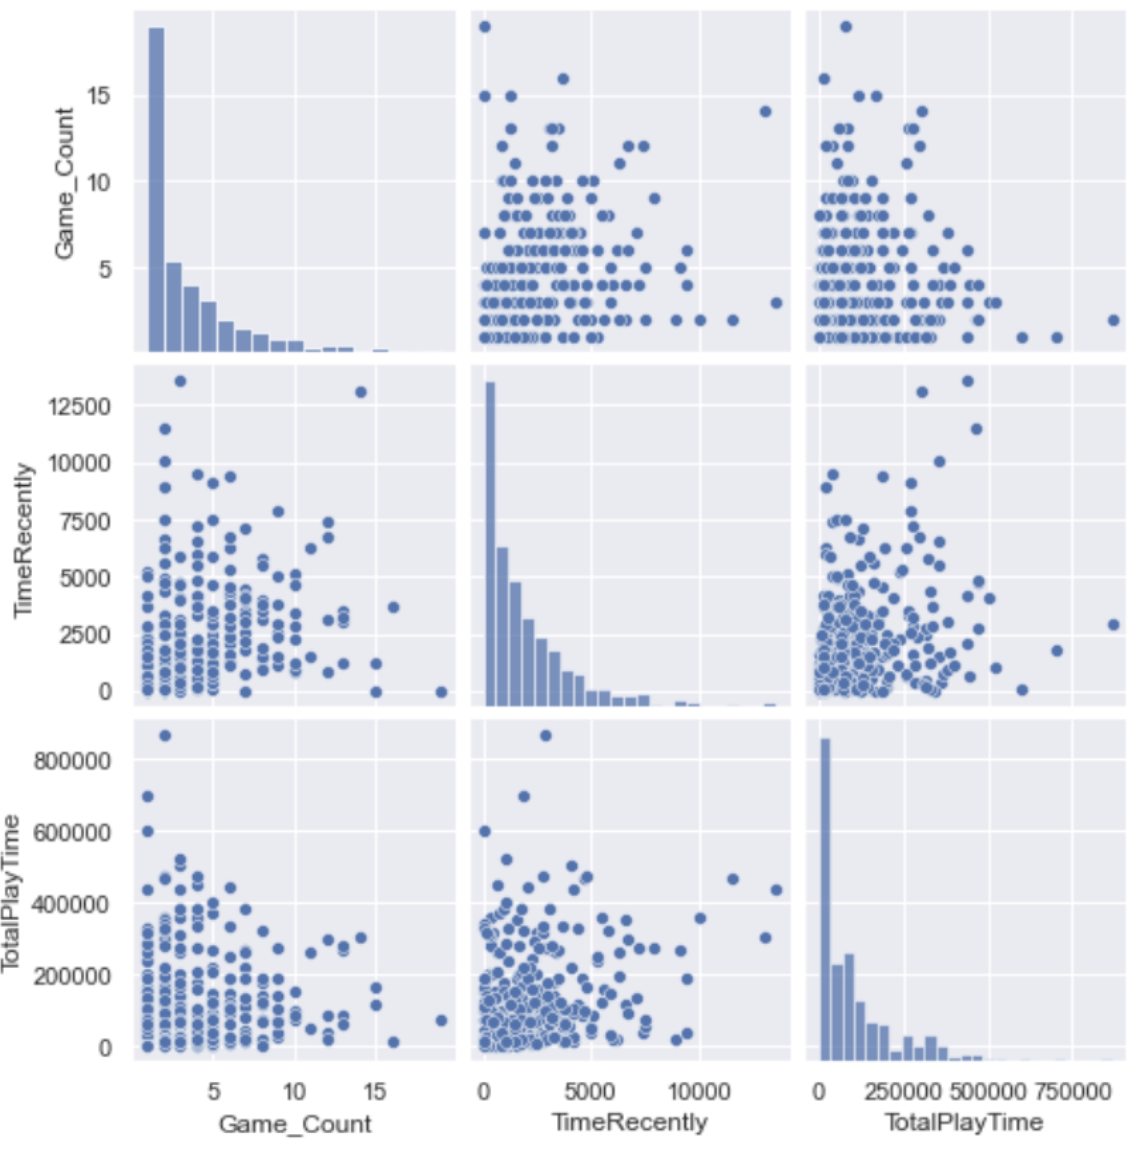

### Graph 2 -- Gamers Frequency per Location
<b>Suggestion -- </b> We suggest to include English, Russian, and Madarin as languages variations  to game development as US, Russia, and China, has the most populated concentrated players

In [ ]:
updated_series = df['Country_Code'].value_counts()[:13]
updated_series = updated_series.append(pd.Series([278], index=['Others']))
updated_series.plot.pie(autopct="%1.1f%%",figsize=(15,15),colors = ['#E86F68','#83B799','#E2CD6D','#C2B28F','#E4D8B4','#C9DCAF','#BF9E86','#5D9678','#8BAB98','#D0C195','#E2D9B3','#ECEAD3','#C9DCAF','#BF9E86'],fontsize=12)

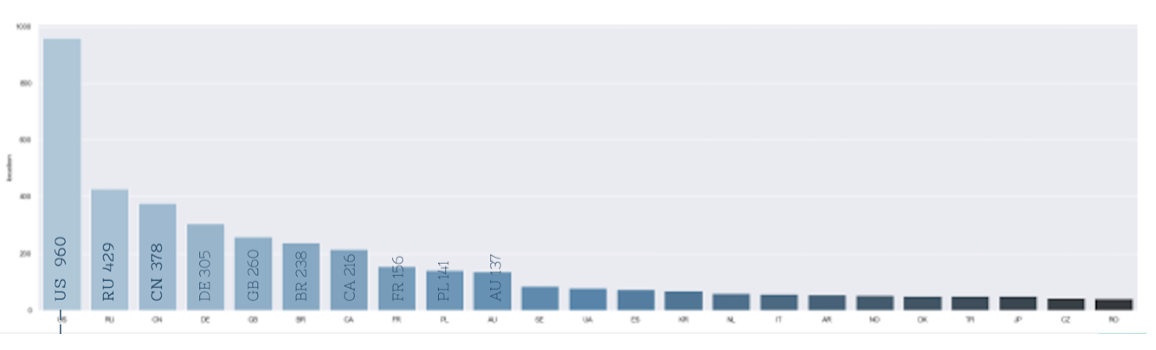

### Graph 3 -- Games Frequency per Location
<b>Suggestion -- </b> Please consider to continue to develop Steam online game in the US region, a potential lightly tapped market. Even though the revenue growth is higher in Russia and China, we suggested the US region due to its consistent revenue growth with +7.3% growth on the year 2020, high spending power, and a leading game industry (as well as a profession).


In [ ]:
import pandas as pd

data = {'US':7.3,'RU':15,'CN':25}
df = pd.DataFrame(data.items(),columns=['countries','growth(%)'],index=['US','RU','CN'])
print(df)
df['growth(%)'].plot.bar(x='countries',color=['#E86F68','#83B799','#E2CD6D'])

fig =df['growth(%)'].plot.bar(x='countries',color=['#E86F68','#83B799','#E2CD6D']).get_figure()
fig.savefig('barchart_revenue.png')

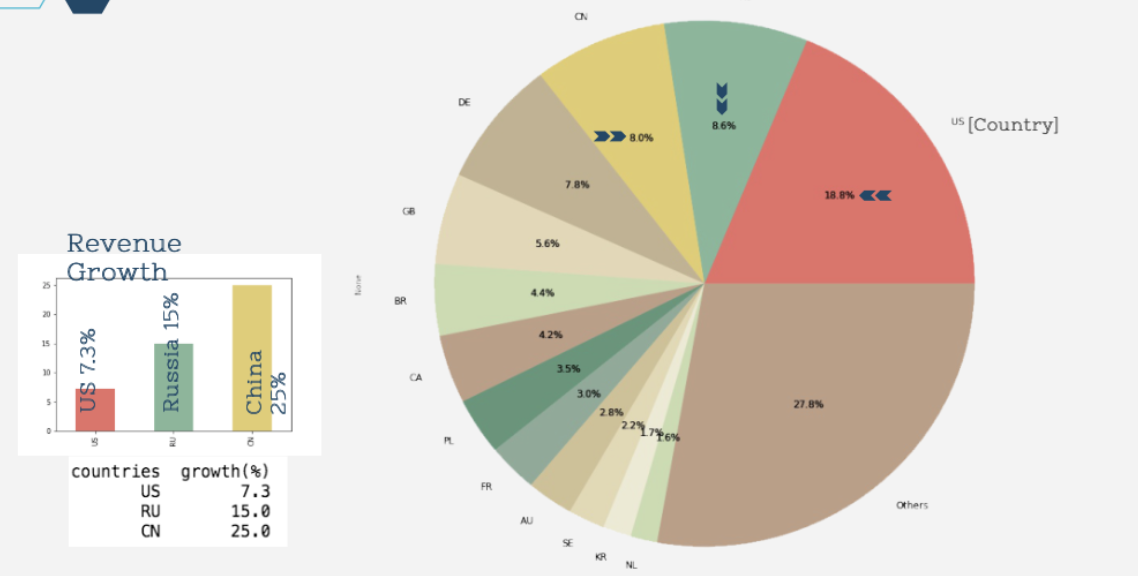

# Moving Forward

Gaming is  a booming industry with wide room for growth. The rapid rise of technology will bring the industry to other realms such as cloud gaming, VR (virtual reality) gaming, and AR (augmented reality) gaming.

In order to target the gaming industry, in marketing point of view, we suggest to target on a personal approach with similar concept such as Instagram hashtags. Scraping game player keyword such as “game soundtrack”, “story rich”, “female protagonist”  on strategy game genre, for example.

Such content will be easier to find by speaking the customer’s language.

Other References:<br>
https://nik-davis.github.io/posts/2019/steam-data-collection/<br>
https://nik-davis.github.io/posts/2019/steam-data-exploration/



### This project is a 3 days collaboration amongst

David Chueng, Kristy [tangkaying@gmail.com] , Mandy [mandy200525@gmail.com] , and Hui Ee [huiee.wong@gmail.com]